# House pricing predictor
In this document, we will build a model step by step, with emphasis on each step to gain insights

## Getting data
After making script to download data containing data about the prices and all, when can call It when needed and load the data into our project

In [188]:
# Importing the function from the script
from get_data import fetch_data

# Download the data
fetch_data()

Fetched the data from teh sourc


## Take a look at the data
After downloading the data, we can now take a look at It using the head function and see what we're working with

In [189]:
import pandas as pd
import os
import numpy as np

DATA_PATH = os.path.join("datasets","housing","housing","housing.csv")

data = pd.read_csv(DATA_PATH)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


If we wanted to get a description of the data that we're dealing with, we use the info() function

In [190]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


We can see that mostly all of the features are numerical, except for the ocean_proximity which is categorical, to see the unique values, take the feature and use the value_counts function

In [191]:
# Gets the unique values in a categorical feature
data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

To see the numerical attributes like the mean and other info, we use teh descrivbe function to get a table containing the info

In [192]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Another quick way to get a grasp of the numerical values, is to plot them as histograms to get the count that each value in the spectrum of that value

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

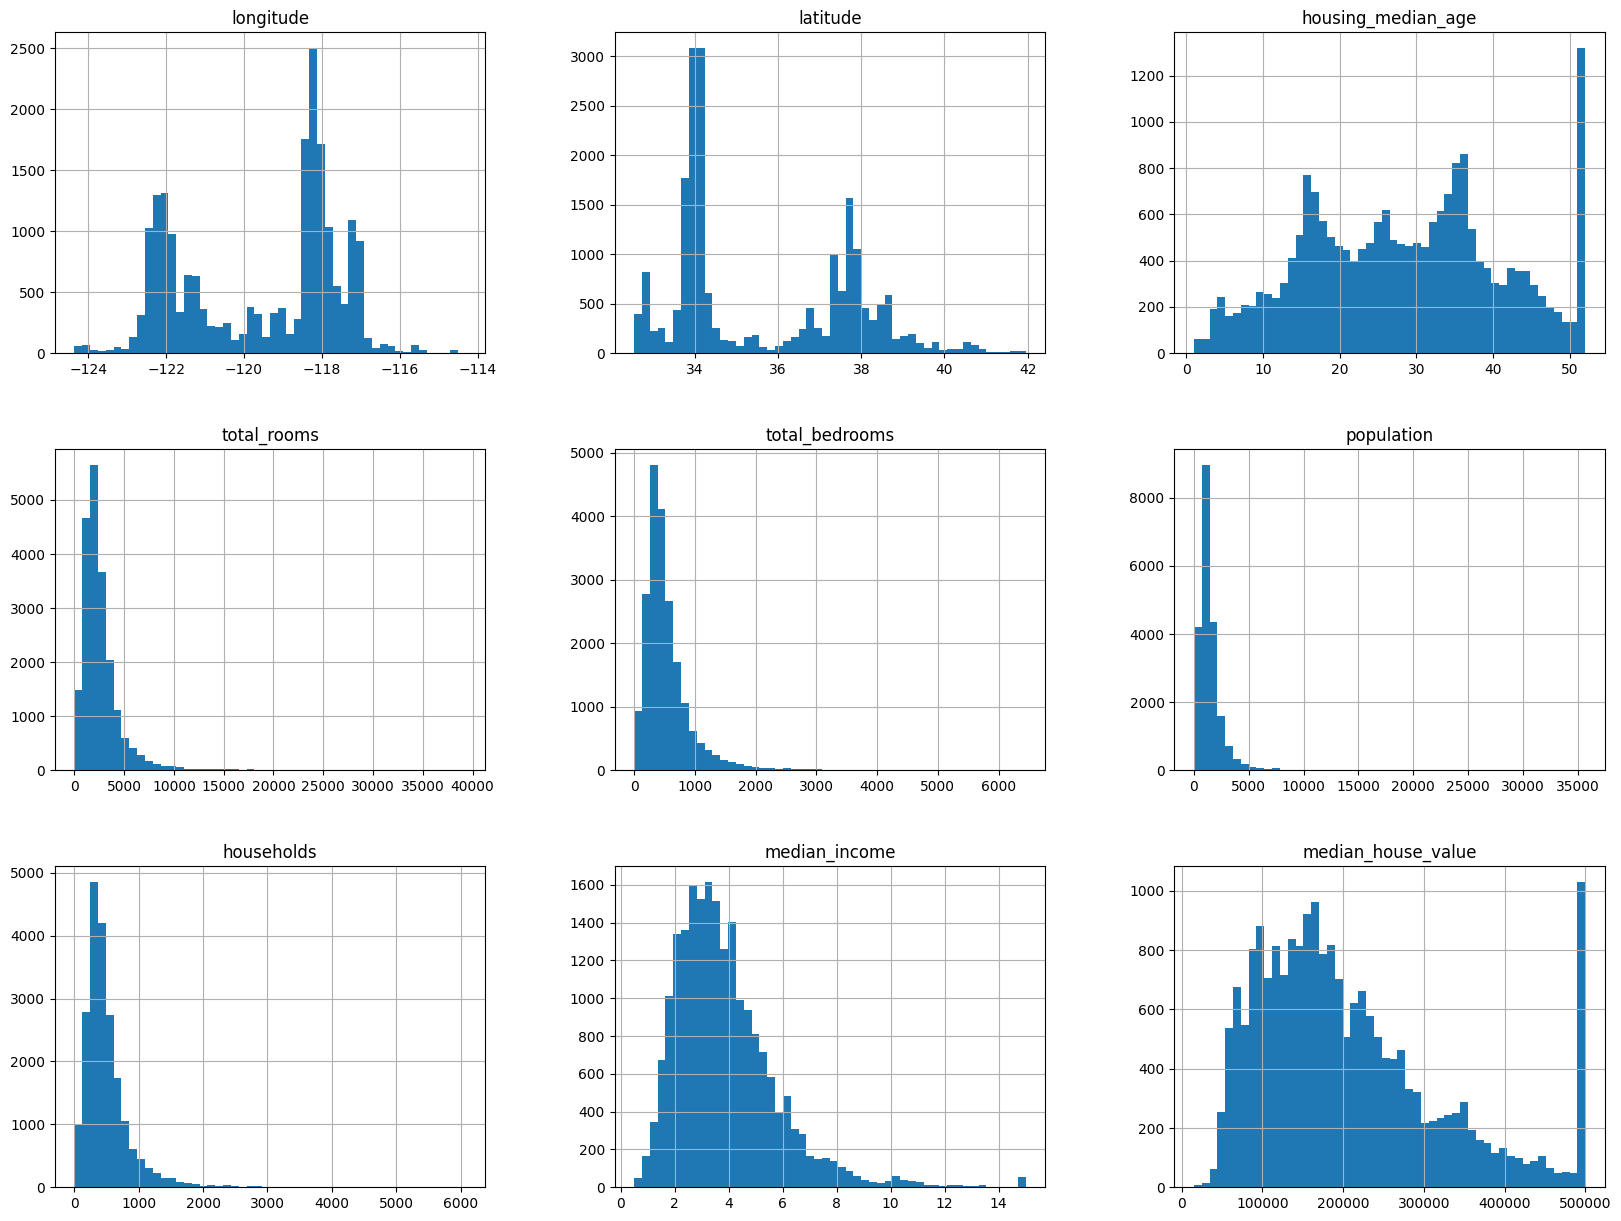

In [193]:
import matplotlib.pyplot as plt

data.hist(bins=50,figsize=(20,15))

## Creating a test set
Before starting working on the prediction mode, we need to first to create a test set to work with after

In [194]:
# the train_test_split takes care of creating both the test set and the randomization of the sets
from sklearn.model_selection import train_test_split

train_set,test_set = train_test_split(data,test_size=.2,random_state=42)

This is a purely random sampling, but this can lead to problems, where some class or type is not well represented in the training, and the model will have some problems. For that, we use the stratified sampling ,where we need to well represent each type in the test set, as well as in the training set. 

Most median income values are clustered around 2–5 (tens of thousands of dollars),
but some median incomes go far beyond 6. It is important to have a sufficient number of instances in your dataset for each stratum, or else the estimate of the stratum’s importance may be biased. This means that you should not have too many strata, and each stratum should be large enough. The following code creates an income category attribute by dividing the median income by 1.5 (to limit the number of income categories), and rounding up using ceil (to have discrete categories), and then merging all the categories greater than 5 into category 5

In [195]:
data['income_cat'] = np.ceil(data['median_income'] / 1.5)
data ['income_cat'] = data['income_cat'].where(data['income_cat'] < 5,5.0)

In [196]:
# Now, we can do the stratified sampling based on each income_cat
from sklearn.model_selection import StratifiedShuffleSplit

# Creating the split object
split = StratifiedShuffleSplit(n_splits=1,test_size=.2,random_state=42)

# Splitting the data based on the income_cat
for train_index, test_index in split.split(data,data['income_cat']):
    strat_train_set = data.iloc[train_index]
    strat_test_set = data.iloc[test_index]

Now, we created training and testing sets that are well-stratified, now we need to delete the created column and get it back to its original state

In [197]:
for set in (strat_train_set,strat_test_set):
    set = set.drop(['income_cat'],axis=1)

## Visualising geographical data
Since, there are longitude and latitude, we can find a way to see the different features on a sort of map

<Axes: xlabel='longitude', ylabel='latitude'>

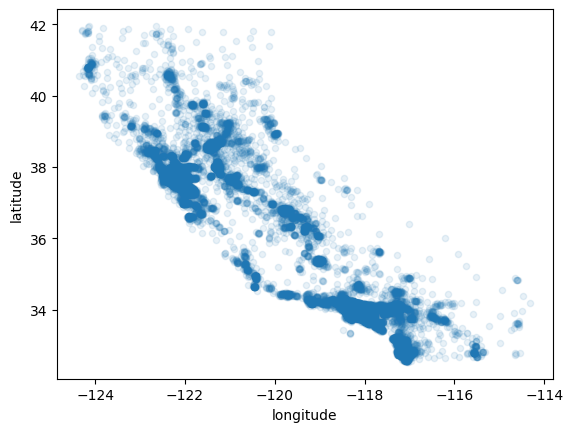

In [198]:
data.plot(kind="scatter",x='longitude',y='latitude',alpha=.1)
# The alpha = 0.1 is made to make us see the density of the number of elements in each place

To add more details, we can change the details of the dots based on some features, like the population for the size, and the median house value on the color of the dot

<Axes: xlabel='longitude', ylabel='latitude'>

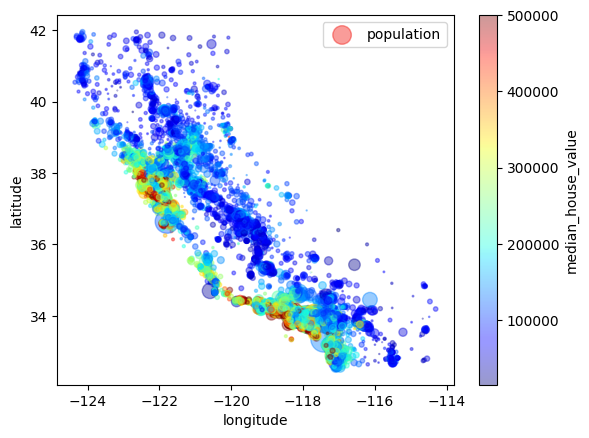

In [199]:
data.plot(kind='scatter',
          x='longitude',
          y="latitude",
          alpha=.4,
          s=data['population']/100,
          label='population',
          c='median_house_value',
          cmap=plt.get_cmap("jet"),
          colorbar=True)

## Looking for correlation
There might be some data that are correlated, either they go in the same direction, or the opposite direction, ir they might even be completely unrelated

And because the data is not sooo large, we can easily compute the standard correlation coefficient (Pearson's r) between each pair of the features using the corr() method

In [200]:
corr_mat = data.corr(numeric_only=True)

In [201]:
corr_mat['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
income_cat            0.643892
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that
there is a strong positive correlation; for example, the median house value tends to go
up when the median income goes up. When the coefficient is close to –1, it means
that there is a strong negative correlation;

Another way to check for correlation between attributes is to use Pandas’
scatter_matrix function

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

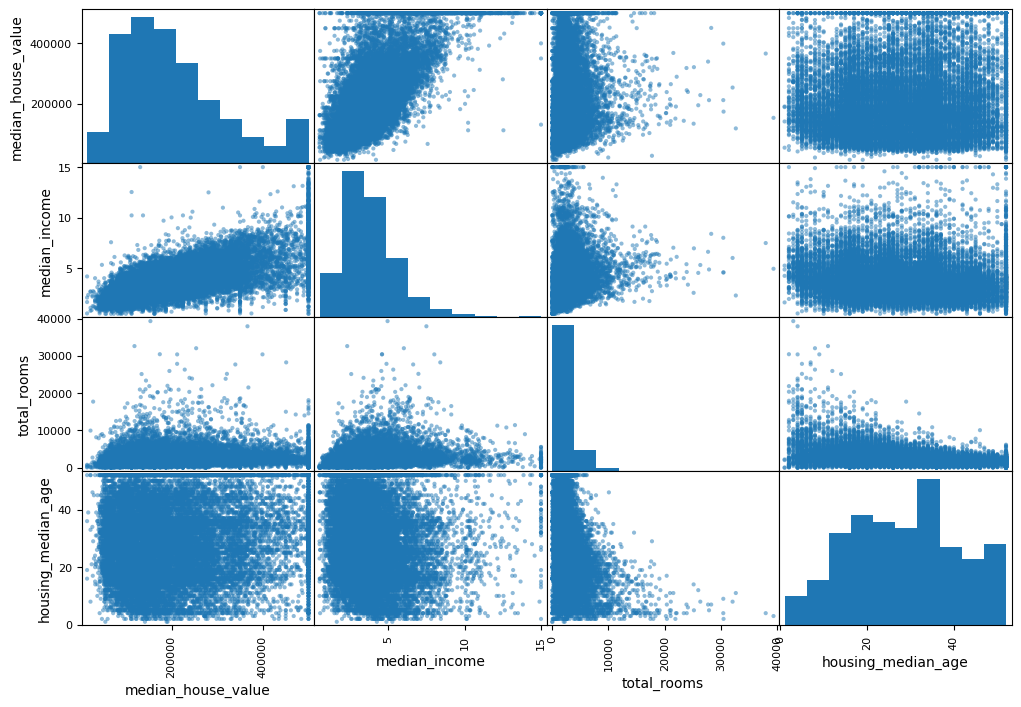

In [202]:
from pandas.plotting import scatter_matrix

num_attributes = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(data[num_attributes],figsize=(12,8))

The main diagonal (top left to bottom right) would be full of straight lines if Pandas
plotted each variable against itself, which would not be very useful. So instead Pandas
displays a histogram of each attribute

The most promising attribute to predict the median house value is the median
income, so let’s zoom in on their correlation scatterplo

<Axes: xlabel='median_income', ylabel='median_house_value'>

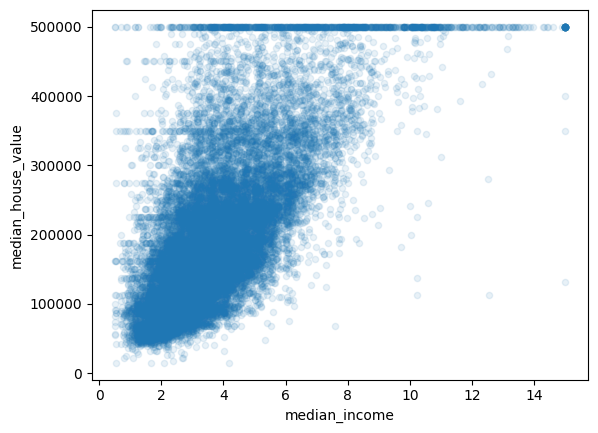

In [203]:
data.plot(kind='scatter',x='median_income',y='median_house_value',alpha=.1)

## Attribute combination
We might go and extract new information from this dataset to gain more insights

One last thing you may want to do before actually preparing the data for Machine
Learning algorithms is to try out various attribute combinations. For example, the
total number of rooms in a district is not very useful if you don’t know how many
households there are. What you really want is the number of rooms per household.
Similarly, the total number of bedrooms by itself is not very useful: you probably
want to compare it to the number of rooms. And the population per household also seems like an interesting attribute combination to look a

In [204]:
data['room_per_household'] = data['total_rooms']/data['households']
data['bedrooms_per_room'] = data['total_bedrooms']/data['total_rooms']
data['population_per_household'] = data['population']/data['households']

Now, let's take a look at the corr matrix

In [205]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,room_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2.0,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2.0,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2.0,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2.0,5.329513,0.219892,2.123209


In [206]:
corr_matr = data.corr(numeric_only=True)
corr_matr['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
income_cat                  0.643892
room_per_household          0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

## Prepare the data for machine learning

Instead of just
doing this manually, you should write functions to do that, for several good reasons:
- This will allow you to reproduce these transformations easily on any dataset (e.g.,
the next time you get a fresh dataset).
- You will gradually build a library of transformation functions that you can reuse
in future projects.
- You can use these functions in your live system to transform the new data before
feeding it to your algorithms.
- This will make it possible for you to easily try various transformations and see
which combination of transformations works best.

Now, let's create a clean training set, and apply some transformations on It to set It up for usage

In [207]:
data = strat_train_set.drop('median_house_value',axis=1)
data_labels = strat_train_set['median_house_value']

**Data Cleaning**

We can notice that the total bedrooms has some missing values, and to do so, we got few options to try
- Getting rid of the rows with the missing values
- Getting rid of the whole feature
- Fill It with the median value
------
We can either work with dropna or fillna, but scikit-learn has a class that is handy for this case, which is **Simple Imputer**

In [208]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

The imputer can only work on numerical values, so we will need to get a copy of this feature and fit It using the imputer

In [209]:
housing_ocean = data.drop('ocean_proximity',axis=1)

imputer.fit(housing_ocean)

SimpleImputer(strategy='median')

Now, that the imputer learned the median value of the feature, we can create a training of It

In [210]:
X = imputer.transform(housing_ocean)

In [211]:
housing_tr = pd.DataFrame(X,columns=housing_ocean.columns)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
0,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,2.0
1,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,5.0
2,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,2.0
3,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,2.0
4,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,3.0
...,...,...,...,...,...,...,...,...,...
16507,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,4.0
16508,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,2.0
16509,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,3.0
16510,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,3.0


## Handling text and categorical attributes

We can convert strings to numerical values easily with scikit-learn

In [212]:
# We use the Label Encoder to encode string values
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

housing_cat = data['ocean_proximity']
housing_cat_encoded = encoder.fit_transform(housing_cat)

housing_cat_encoded

array([3, 0, 1, ..., 4, 0, 4])

We can even see the names of the classes using the encoder.classes

In [213]:
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

But, there is a problem with this, is that the model might think that 0 is close 1, but if you read the classes, you see that 5 is close 0

For that, we work with onehotencoding. Which creates a kind of feature for each value, and it gives It 0 or 1

But the OneHotEncoder.fit_transform expects a 2D array, so we need to change the dimensions of the array

In [214]:
from sklearn.preprocessing import OneHotEncoder

oh_encoder = OneHotEncoder()

housing_onehot =  oh_encoder.fit_transform(housing_cat_encoded.reshape(-1,1))

housing_onehot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

Instead of passing by the LabelEncoder, and then the OneHotEncoder. We can just using the LabelBinarizer

In [215]:
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()

housing_encoded_onehot = encoder.fit_transform(housing_cat)

housing_encoded_onehot

array([[0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1]])

Note that this returns a dense NumPy array by default. You can get a sparse matrix
instead by passing sparse_output=True to the LabelBinarizer constructor

## Custom Transformers
Sometimes, scikit will not provide the transformations that we need, and to use It in pipelines, we'll need to put them as a transformer class , and set the fit, transform and fit_transform methods

In [216]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    
    # The init constructor
    def __init__(self,add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
        
    def fit(self,X,y=None):
        return self # We don't anything to do
    
    def transform(self,X,y=None):
        rooms_per_household = X[:,rooms_ix]/X[:,household_ix]
        population_per_household = X[:,population_ix]/X[:,household_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix]/X[:,rooms_ix]
            
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
        
        else:
            return np.c_[X,rooms_per_household,population_per_household]

In [217]:
# Now, we can use this transform as needed

attr_adder = CombinedAttributesAdder(True)

housing_extra_attrs = attr_adder.transform(data.values)

In [218]:
housing_extra_attrs

array([[-122.42, 37.8, 52.0, ..., 3.211798839458414, 1.5241779497098646,
        0.335742246311352],
       [-118.38, 34.14, 40.0, ..., 5.504201680672269, 1.865546218487395,
        0.1801526717557252],
       [-121.98, 38.36, 33.0, ..., 5.334975369458128, 2.768472906403941,
        0.20036934441366575],
       ...,
       [-117.06, 32.59, 13.0, ..., 5.157894736842105, 3.7026315789473685,
        0.19770408163265307],
       [-118.4, 34.06, 37.0, ..., 4.511933174224343, 2.058472553699284,
        0.23089129859825444],
       [-122.41, 37.66, 44.0, ..., 2.0330188679245285,
        3.2169811320754715, 0.45243619489559167]], dtype=object)

## Feature scaling

One of the most important transformations you need to apply to your data is feature
scaling. With few exceptions, Machine Learning algorithms don’t perform well when
the input numerical attributes have very different scales. This is the case for the hous‐
ing data: the total number of rooms ranges from about 6 to 39,320, while the median
incomes only range from 0 to 15. Note that scaling the target values is generally not
required.
There are two common ways to get all attributes to have the same scale: min-max
scaling and standardization

## Transform Pipelines

As we can see, that there are many steps and transformations that our data will go through before getting into our model, for that we create Pipelines that makes this process automatic

In [219]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

# This pipeline is only for numerical values
num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('attribs_adder',CombinedAttributesAdder(True)),
    ('MinMaxScaler',MinMaxScaler())
])

In [220]:
housing_data_tr = num_pipeline.fit_transform(housing_ocean)

But, we don't just have numerical values, but also categorical values as in the ocean proximity, and we will want to use LabelBinarizer

We can merge the 2 transformations ,using the FeatureUnion to merge 2 pipelines

In [221]:
# We'll create a transformer that takes the selected features

class DataFrameSelector(BaseEstimator,TransformerMixin):
    
    def __init__(self,attributes):
        self.attributes = attributes
        
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        return X[self.attributes].values

In [224]:
from sklearn.pipeline import FeatureUnion

num_attrs = list(housing_ocean)
cat_attrs = ['ocean_proximity']

print(num_attrs)
print(cat_attrs)

num_pipeline = Pipeline([
    ('selector',DataFrameSelector(num_attrs)),
    ('imputer',SimpleImputer(strategy='median')),
    ('attributes_adder',CombinedAttributesAdder(True)),
    ('minmaxscaler',MinMaxScaler())
])

# Category pipeline

cat_pipeline = Pipeline([
    ('selector',DataFrameSelector(cat_attrs)),
    ('labelBinarizer',OneHotEncoder())
])

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline',num_pipeline),
    ('cat_pipeline',cat_pipeline)
])

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'income_cat']
['ocean_proximity']


In [233]:
housing_prepared = full_pipeline.fit_transform(data).toarray()

In [235]:

prepared_data = pd.DataFrame(housing_prepared)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [231]:
prepared_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.195740,0.558511,1.000000,0.084414,0.179417,0.096491,0.192832,0.110261,0.25,0.016472,0.001658,0.107395,0.0,0.0,0.0,1.0,0.0
1,0.605477,0.169149,0.764706,0.049926,0.056853,0.040670,0.066455,0.385353,1.00,0.032728,0.002338,0.051450,1.0,0.0,0.0,0.0,0.0
2,0.240365,0.618085,0.627451,0.027494,0.034788,0.034290,0.037708,0.133315,0.25,0.031528,0.004138,0.058719,0.0,1.0,0.0,0.0,0.0
3,0.734280,0.127660,0.313725,0.106109,0.136898,0.112992,0.145417,0.121509,0.25,0.031644,0.003334,0.059982,0.0,1.0,0.0,0.0,0.0
4,0.628803,0.129787,0.686275,0.110992,0.194878,0.117102,0.218592,0.208914,0.50,0.020113,0.001872,0.086406,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.603448,0.139362,0.784314,0.056844,0.095990,0.057355,0.097443,0.290382,0.75,0.024027,0.002195,0.082632,1.0,0.0,0.0,0.0,0.0
16508,0.511156,0.401064,0.431373,0.074851,0.095184,0.086861,0.099123,0.142991,0.25,0.032951,0.003936,0.058952,0.0,1.0,0.0,0.0,0.0
16509,0.739351,0.004255,0.235294,0.099649,0.124658,0.172433,0.141684,0.245631,0.50,0.030272,0.005999,0.057760,0.0,0.0,0.0,0.0,1.0
16510,0.603448,0.160638,0.705882,0.096114,0.140441,0.105631,0.156244,0.251417,0.50,0.025692,0.002723,0.069694,1.0,0.0,0.0,0.0,0.0
